# Loading Data

In [1]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..'))
from configs import paths_helper

# Set up directoris for training a yolo model

# Images directories
from pathlib import Path
DATA_DIR = Path(paths_helper.DATA_DIR)
DATASET_DIR = DATA_DIR
IMAGES_DIR = DATASET_DIR / 'images'
TRAIN_IMAGES_DIR = IMAGES_DIR / 'train'
VAL_IMAGES_DIR = IMAGES_DIR / 'val'
TEST_IMAGES_DIR = IMAGES_DIR / 'test'

# Labels directories
LABELS_DIR = DATASET_DIR / 'labels'
TRAIN_LABELS_DIR = LABELS_DIR / 'train'
VAL_LABELS_DIR = LABELS_DIR / 'val'
TEST_LABELS_DIR = LABELS_DIR / 'test'

print(f'dataset_dir: {DATASET_DIR}')
print(f'images_dir: {IMAGES_DIR}')
print(f'label_dir: {LABELS_DIR}')

import pandas as pd
train = pd.read_csv(DATASET_DIR / 'Train.csv')
train

dataset_dir: d:\github\ghana-crop-disease-detection-challenge\data
images_dir: d:\github\ghana-crop-disease-detection-challenge\data\images
label_dir: d:\github\ghana-crop-disease-detection-challenge\data\labels


Image_ID  confidence                      class         ymin  \
0      id_11543h.jpg         1.0      Pepper_Bacterial_Spot   194.649671   
1      id_11543h.jpg         1.0      Pepper_Bacterial_Spot   149.632401   
2      id_11543h.jpg         1.0      Pepper_Bacterial_Spot   234.046875   
3      id_11543h.jpg         1.0      Pepper_Bacterial_Spot   221.277138   
4      id_11ee1c.jpg         1.0            Pepper_Fusarium  2000.563598   
...              ...         ...                        ...          ...   
41024  id_38x7ln.jpg         1.0                Corn_Streak   608.472222   
41025  id_7uqmqp.jpg         1.0               Corn_Healthy  1483.095425   
41026  id_bnqorw.jpg         1.0  Corn_Cercospora_Leaf_Spot   943.260816   
41027  id_m2kklk.jpg         1.0            Tomato_Septoria  1855.337090   
41028  id_zie6j4.jpg         1.0            Tomato_Septoria  2885.765343   

              xmin         ymax         xmax  
0       328.803454   208.107730   341.967928  
1       256.768914   162.910362   266.195724  
2       327.138158   252.712993   338.876645  
3       340.411184   238.593750   354.651316  
4       989.588908  2184.252196  1401.748952  
...            ...          ...          ...  
41024   817.741770   736.352881   997.047325  
41025   818.249483  1786.752393  1152.860096  
41026  1015.079256  1007.928503  1133.177119  
41027  1748.733977  2046.688525  1868.580553  
41028  2666.672615  3024.000000  2832.242863  

[41029 rows x 7 columns]

In [2]:
# Create a data.yaml file required by yolo
import yaml

class_names = sorted(train['class'].unique().tolist())
num_classes = len(class_names)

data_yaml = {
    'train': str(TRAIN_IMAGES_DIR),
    'val': str(VAL_IMAGES_DIR),
    'test': str(TEST_IMAGES_DIR),
    'nc': num_classes,
    'names': class_names
}

yaml_path = 'data.yaml'
with open(yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

# Preview data yaml file
data_yaml

{'train': 'd:\\github\\ghana-crop-disease-detection-challenge\\data\\images\\train',
 'val': 'd:\\github\\ghana-crop-disease-detection-challenge\\data\\images\\val',
 'test': 'd:\\github\\ghana-crop-disease-detection-challenge\\data\\images\\test',
 'nc': 23,
 'names': ['Corn_Cercospora_Leaf_Spot',
  'Corn_Common_Rust',
  'Corn_Healthy',
  'Corn_Northern_Leaf_Blight',
  'Corn_Streak',
  'Pepper_Bacterial_Spot',
  'Pepper_Cercospora',
  'Pepper_Early_Blight',
  'Pepper_Fusarium',
  'Pepper_Healthy',
  'Pepper_Late_Blight',
  'Pepper_Leaf_Blight',
  'Pepper_Leaf_Curl',
  'Pepper_Leaf_Mosaic',
  'Pepper_Septoria',
  'Tomato_Bacterial_Spot',
  'Tomato_Early_Blight',
  'Tomato_Fusarium',
  'Tomato_Healthy',
  'Tomato_Late_Blight',
  'Tomato_Leaf_Curl',
  'Tomato_Mosaic',
  'Tomato_Septoria']}

Plotting id_11543h.jpg with 4 bounding boxes.


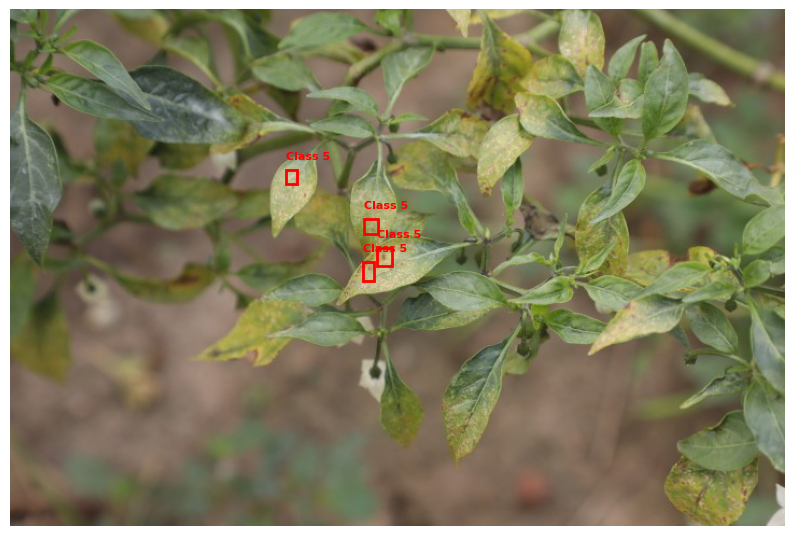

Plotting id_11gglx.jpg with 11 bounding boxes.


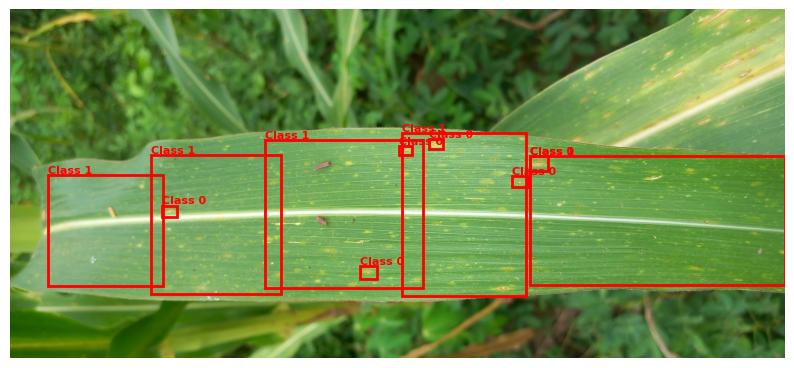

Plotting id_11zffz.jpg with 10 bounding boxes.


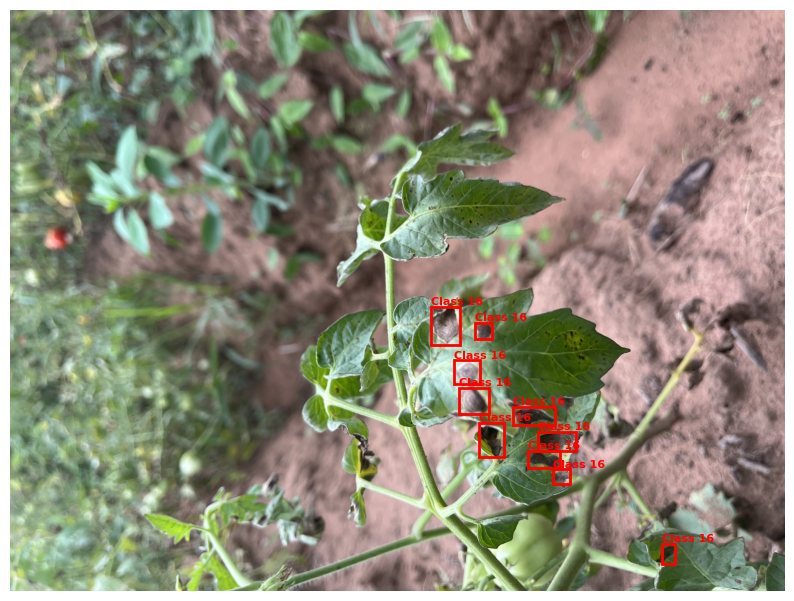

Plotting id_127uhh.jpg with 1 bounding boxes.


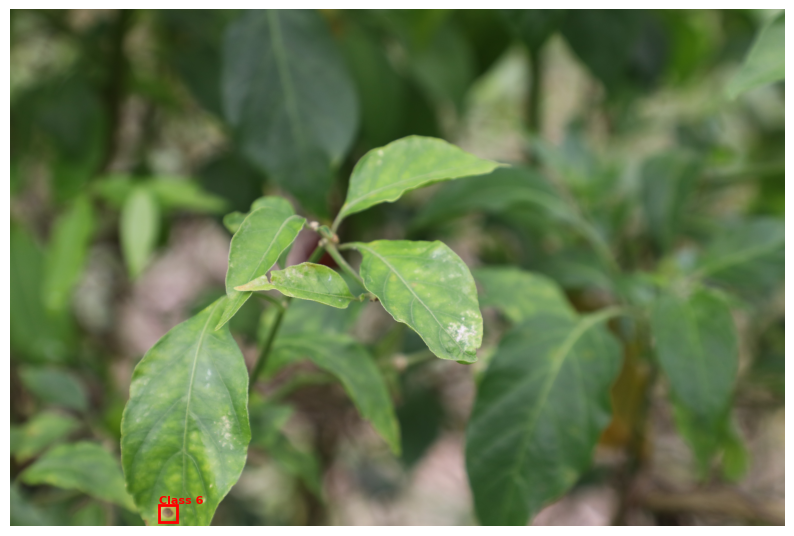

Plotting id_12q33h.jpg with 3 bounding boxes.


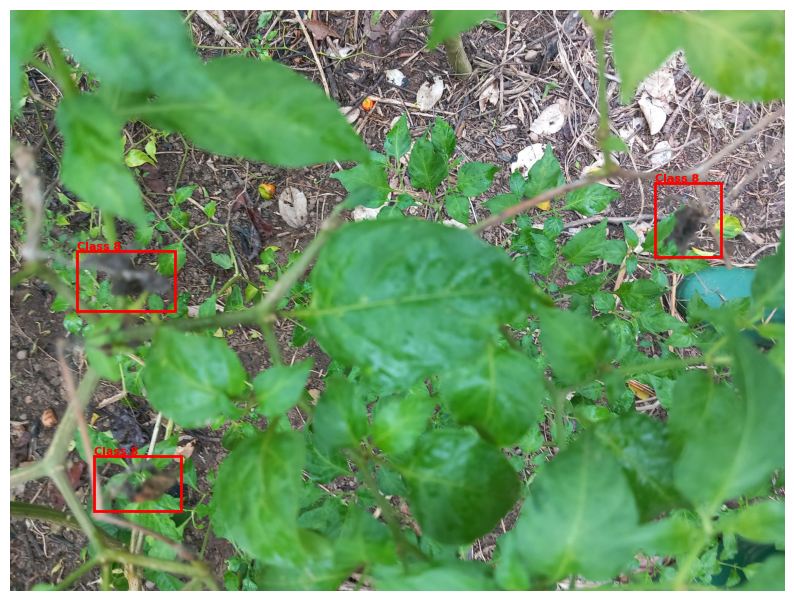

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Plot some images and their bboxes to ensure the conversion was done correctly
def load_annotations(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    boxes = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        boxes.append((class_id, x_center, y_center, width, height))
    return boxes

# Function to plot an image with its bounding boxes
def plot_image_with_boxes(image_path, boxes):
    # Load the image
    image = np.array(Image.open(str(image_path)))


    # Get image dimensions
    h, w, _ = image.shape

    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # Plot each bounding box
    for box in boxes:
        class_id, x_center, y_center, width, height = box
        # Convert YOLO format to corner coordinates
        xmin = int((x_center - width / 2) * w)
        ymin = int((y_center - height / 2) * h)
        xmax = int((x_center + width / 2) * w)
        ymax = int((y_center + height / 2) * h)

        # Draw the bounding box
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                          edgecolor='red', facecolor='none', linewidth=2))
        plt.text(xmin, ymin - 10, f'Class {int(class_id)}', color='red', fontsize=8, weight='bold')

    plt.axis('off')
    plt.show()

# Directories for images and labels
IMAGE_DIR = TRAIN_IMAGES_DIR
LABEL_DIR = TRAIN_LABELS_DIR

# Plot a few images with their annotations
for image_name in os.listdir(IMAGE_DIR)[:5]:
    image_path = IMAGE_DIR / image_name
    label_path = LABEL_DIR / (image_name.replace('.jpg', '.txt').replace('.png', '.txt'))

    if label_path.exists():
        boxes = load_annotations(label_path)
        print(f"Plotting {image_name} with {len(boxes)} bounding boxes.")
        plot_image_with_boxes(image_path, boxes)
    else:
        print(f"No annotations found for {image_name}.")

In [ ]:
import os

# Disable W&B logging
os.environ['WANDB_MODE'] = 'disabled'

from ultralytics import YOLO

# Load YOLO model
model = YOLO('yolov8n.pt')

# Train the model
model.train(
    data='data.yaml',          # Path to dataset configuration
    epochs=50,                 # Number of epochs
    imgsz=512,                # Image size (height, width)
    batch=32,                   # Batch size
    device=0,                  # Device to use (0 for first GPU)
    patience=5
)

New https://pypi.org/project/ultralytics/8.3.46 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.9  Python-3.9.20 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

train: Scanning D:\github\ghana-crop-disease-detection-challenge\data\labels\train.cache... 3676 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3676/3676 [00:00<?, ?it/s]Scanning D:\github\ghana-crop-disease-detection-challenge\data\labels\train.cache... 3676 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3676/3676 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning D:\github\ghana-crop-disease-detection-challenge\data\labels\val.cache... 1226 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1226/1226 [00:00<?, ?it/s]Scanning D:\github\ghana-crop-disease-detection-challenge\data\labels\val.cache... 1226 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1226/1226 [00:00<?, ?it/s]


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00037, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.95G      2.729      5.011      1.904        118        512: 100%|██████████| 230/230 [01:32<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/39 [00:00<?, ?it/s]

WARNING  NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:37<00:00,  1.04it/s]


                   all       1226      10252      0.438      0.039     0.0188    0.00676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.43G      2.586      3.732      1.571         89        512: 100%|██████████| 230/230 [01:27<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:18<00:00,  2.09it/s]


                   all       1226      10252      0.338      0.125     0.0581      0.022

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.79G      2.474      3.142      1.551        235        512: 100%|██████████| 230/230 [01:17<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.93it/s]


                   all       1226      10252      0.354      0.126     0.0623      0.024

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.93G      2.403      2.902      1.538        155        512: 100%|██████████| 230/230 [01:16<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  1.97it/s]


                   all       1226      10252      0.187       0.17     0.0773     0.0289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.35G      2.399      2.786      1.528        179        512: 100%|██████████| 230/230 [01:26<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.92it/s]


                   all       1226      10252      0.297      0.147     0.0882     0.0346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.01G       2.35      2.688      1.514        186        512: 100%|██████████| 230/230 [01:26<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.94it/s]


                   all       1226      10252      0.316      0.189      0.109     0.0439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.98G       2.31      2.566      1.491        121        512: 100%|██████████| 230/230 [01:28<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.92it/s]


                   all       1226      10252      0.345      0.178      0.116     0.0462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.11G      2.293      2.539      1.486        212        512: 100%|██████████| 230/230 [01:22<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.92it/s]


                   all       1226      10252      0.342      0.205      0.121     0.0485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.22G      2.287      2.481      1.469        137        512: 100%|██████████| 230/230 [01:19<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.84it/s]


                   all       1226      10252       0.39      0.212      0.139     0.0563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.07G      2.259      2.403      1.466        151        512: 100%|██████████| 230/230 [01:18<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.90it/s]


                   all       1226      10252      0.312      0.198      0.146     0.0585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.28G      2.227      2.384       1.45        180        512: 100%|██████████| 230/230 [01:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.95it/s]


                   all       1226      10252      0.369      0.228      0.153     0.0622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.07G       2.22      2.326      1.452        219        512: 100%|██████████| 230/230 [01:21<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.95it/s]


                   all       1226      10252      0.414      0.226      0.158      0.064

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.3G       2.22      2.298      1.442        136        512: 100%|██████████| 230/230 [01:21<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.82it/s]


                   all       1226      10252      0.391      0.233      0.162     0.0657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.07G      2.196      2.252      1.434        170        512: 100%|██████████| 230/230 [01:22<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  1.95it/s]


                   all       1226      10252      0.364      0.239      0.166      0.069

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.22G      2.199      2.247      1.432        173        512: 100%|██████████| 230/230 [01:20<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.85it/s]


                   all       1226      10252      0.423      0.224      0.162     0.0675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.19G      2.185      2.232      1.427        119        512: 100%|██████████| 230/230 [01:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  2.01it/s]


                   all       1226      10252      0.371      0.235      0.174      0.072

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       1.9G      2.187       2.21      1.418        192        512: 100%|██████████| 230/230 [01:19<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.93it/s]


                   all       1226      10252      0.403      0.246      0.164     0.0672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.22G      2.161      2.181      1.417        123        512: 100%|██████████| 230/230 [01:16<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.89it/s]


                   all       1226      10252      0.413      0.252       0.18     0.0754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.15G       2.16      2.148       1.41        209        512: 100%|██████████| 230/230 [01:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.86it/s]


                   all       1226      10252      0.355      0.264      0.189     0.0784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.21G       2.14      2.114      1.407        156        512: 100%|██████████| 230/230 [01:20<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.84it/s]


                   all       1226      10252      0.438      0.264        0.2     0.0825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.23G      2.165      2.131      1.399        255        512: 100%|██████████| 230/230 [01:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.78it/s]


                   all       1226      10252      0.383      0.257      0.199     0.0822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.1G      2.144      2.097      1.391        176        512: 100%|██████████| 230/230 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  1.97it/s]


                   all       1226      10252      0.359      0.275      0.194     0.0809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.27G      2.134      2.076       1.39        195        512: 100%|██████████| 230/230 [01:21<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  1.97it/s]


                   all       1226      10252      0.372      0.268        0.2     0.0838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.17G      2.124      2.058      1.383        144        512: 100%|██████████| 230/230 [01:24<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  1.96it/s]


                   all       1226      10252      0.406      0.271      0.209     0.0891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.03G      2.108      2.035      1.381        257        512: 100%|██████████| 230/230 [01:22<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.91it/s]


                   all       1226      10252      0.403      0.292       0.21     0.0866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.05G      2.094      2.018      1.372        108        512: 100%|██████████| 230/230 [01:24<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.80it/s]


                   all       1226      10252      0.392      0.286      0.214     0.0914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.12G      2.118      2.025      1.391        129        512: 100%|██████████| 230/230 [01:27<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  2.00it/s]


                   all       1226      10252      0.453      0.285      0.222     0.0927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.78G      2.091      1.994       1.37        134        512: 100%|██████████| 230/230 [01:29<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:24<00:00,  1.58it/s]


                   all       1226      10252      0.418      0.288      0.216     0.0919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.19G      2.091      1.993      1.373        167        512: 100%|██████████| 230/230 [01:26<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:22<00:00,  1.76it/s]


                   all       1226      10252      0.414       0.28      0.226     0.0955

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.32G      2.085      1.972      1.358        182        512: 100%|██████████| 230/230 [01:24<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:21<00:00,  1.78it/s]


                   all       1226      10252      0.441       0.29      0.228     0.0941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.08G      2.082      1.963       1.36        192        512: 100%|██████████| 230/230 [01:27<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:22<00:00,  1.70it/s]


                   all       1226      10252      0.419      0.281      0.222     0.0955

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.11G      2.081      1.964      1.358        208        512: 100%|██████████| 230/230 [01:27<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  1.97it/s]


                   all       1226      10252      0.421      0.283      0.229     0.0972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.06G      2.053      1.918       1.35        123        512: 100%|██████████| 230/230 [01:22<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.86it/s]


                   all       1226      10252      0.473      0.301       0.24      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.95G      2.072      1.936       1.36        229        512: 100%|██████████| 230/230 [01:18<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:18<00:00,  2.07it/s]


                   all       1226      10252      0.466      0.285      0.246      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.5G      2.076      1.932      1.352        220        512: 100%|██████████| 230/230 [01:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  2.04it/s]


                   all       1226      10252      0.423      0.297      0.242      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.07G      2.064      1.913      1.344        135        512: 100%|██████████| 230/230 [01:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:18<00:00,  2.06it/s]


                   all       1226      10252      0.451      0.304       0.25      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.41G      2.033      1.896      1.332        181        512: 100%|██████████| 230/230 [01:20<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  1.98it/s]


                   all       1226      10252      0.445      0.304      0.245      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.79G      2.033       1.88       1.34        282        512: 100%|██████████| 230/230 [01:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:20<00:00,  1.91it/s]


                   all       1226      10252      0.421      0.305      0.247      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.92G      2.034      1.866      1.331        184        512: 100%|██████████| 230/230 [01:20<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  2.03it/s]


                   all       1226      10252      0.457        0.3      0.255      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.41G      2.023      1.857      1.328        230        512: 100%|██████████| 230/230 [01:20<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:19<00:00,  2.03it/s]


                   all       1226      10252      0.392      0.325      0.261       0.11
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
